In [1]:
import yfinance as yf

In [3]:
!pip install --upgrade yfinance

In [4]:
yf.__version__

'0.2.65'

In [24]:
from datetime import date

today = date.today()
today

datetime.date(2025, 8, 24)

In [46]:
import time

ticker = 'AAPL'

start_date = '2023-08-01'
end_date = date.today()

data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
close = yf.download(ticker, start=start_date, end=end_date, interval="1d")["Close"]

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_42503/2303925414.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed
/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_42503/2303925414.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close = yf.download(ticker, start=start_date, end=end_date, interval="1d")["Close"]
[*********************100%***********************]  1 of 1 completed


In [47]:
close.head()

Ticker,AAPL
Date,
2023-08-01,193.451370
2023-08-02,190.454788
2023-08-03,189.060333
2023-08-04,179.981674
2023-08-07,176.876312


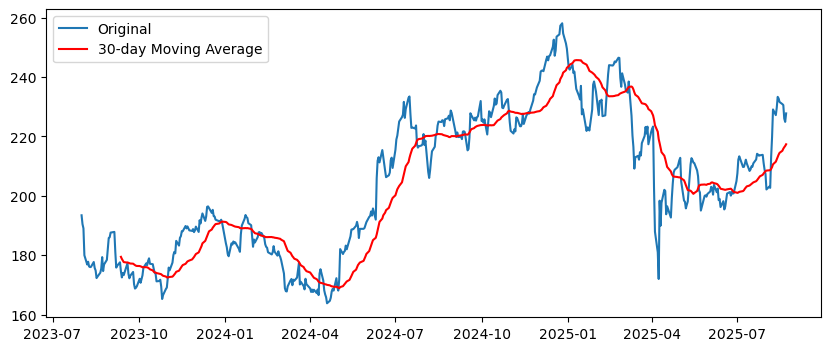

In [48]:
import matplotlib.pyplot as plt

# Moving Average (30 day window)
close_ma30 = close.rolling(window=30).mean()

plt.figure(figsize=(10,4))
plt.plot(close, label="Original")
plt.plot(close_ma30, label="30-day Moving Average", color="red")
plt.legend(); plt.show()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 518 entries, 2023-08-01 to 2025-08-22
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   518 non-null    float64
 1   (High, AAPL)    518 non-null    float64
 2   (Low, AAPL)     518 non-null    float64
 3   (Open, AAPL)    518 non-null    float64
 4   (Volume, AAPL)  518 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 24.3 KB


In [50]:
data.rename(columns={'Close/Last': 'Close'}, inplace=True)

In [51]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-08-01,193.451370,194.559006,193.125010,194.074423,35175100
2023-08-02,190.454788,193.026087,189.732848,192.887632,50389300
2023-08-03,189.060333,190.247088,188.585635,189.455928,61235200
2023-08-04,179.981674,185.312193,179.912439,183.472718,115956800
2023-08-07,176.876312,181.109079,175.392865,180.120115,97576100


In [52]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-08-01,193.451370,194.559006,193.125010,194.074423,35175100
2023-08-02,190.454788,193.026087,189.732848,192.887632,50389300
2023-08-03,189.060333,190.247088,188.585635,189.455928,61235200
2023-08-04,179.981674,185.312193,179.912439,183.472718,115956800
2023-08-07,176.876312,181.109079,175.392865,180.120115,97576100
...,...,...,...,...,...
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600


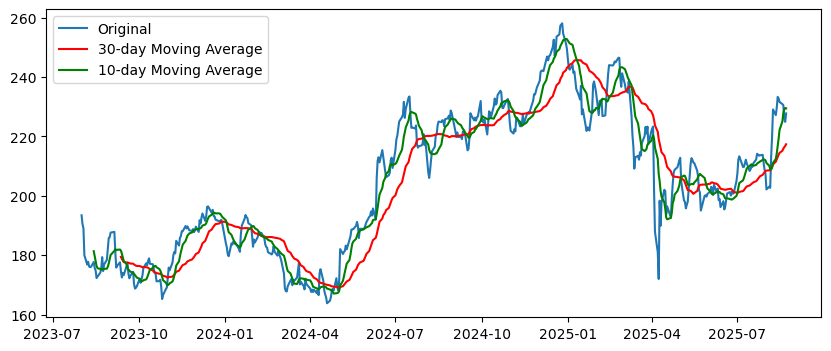

In [53]:
import matplotlib.pyplot as plt

# 2. Closing Price data
close = data['Close']

# 3. Moving Average Calculations
close_ma30 = close.rolling(window=30).mean()
close_ma10 = close.rolling(window=10).mean()

# 4. Visualization
plt.figure(figsize=(10,4))
plt.plot(close, label="Original")
plt.plot(close_ma30, label="30-day Moving Average", color="red")
plt.plot(close_ma10, label="10-day Moving Average", color="green")
plt.legend()
plt.show()


In [54]:
close=data['Close']

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_42503/1817439317.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = close.resample("M").mean()  # 월별 평균


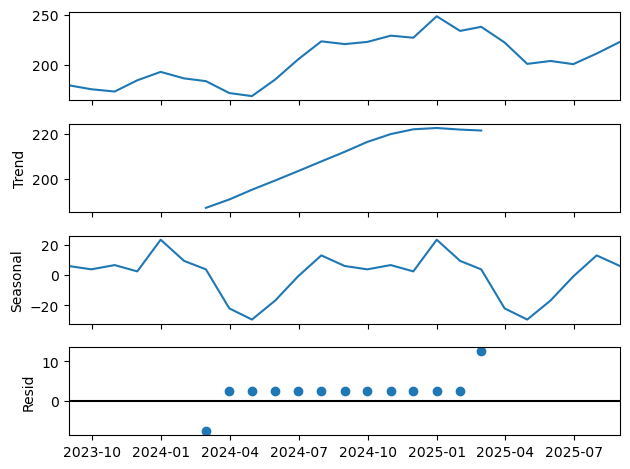

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

monthly = close.resample("M").mean()  # 월별 평균
result = seasonal_decompose(monthly, model="additive", period=12)
result.plot(); plt.show()
